In [63]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np
from hyper import predict

In [64]:
reaction_mech = {
        'Schirmeister': '../../KM/2009_Schirmeister_EDC/chem_annotated_irreversible.cti'
    }
Tin=350
Pin = 13
CCl4 = 1000
raw_T_list = [Tin]
x = [0,4,7,10,13,18,22]
params={'t00': 88.49998517024153, 't04': 35.10448840568699, 't07': 21.023993662366614, 't10': 2.8973038546081455, 't13': 0.44117869582259805, 't18': 1.332990748044338}


# 12.4 350
# params = {'t00': 68.59434991088177, 't04': 25.15770719863841, 't07': 15.94066607777022, 't10': 2.9522635630781706, 't13': 0.4418700098815036, 't18': 1.3295334256469555}

# params = {'t00': 87.88967332701257, 't04': 36.598402617551976, 't07': 14.038647134521124, 't10': 1.6871436070966268, 't13': 1.9304271179067618, 't18': 2.505817543564093}
# for i in range(1,23):
#     T_list[i] = T_list[i-1]+params[f"t{i}"]
# for _, value in params.items():
#     raw_T_list.append(round((raw_T_list[-1]+value), 2))
# cs = CubicSpline(x,raw_T_list)
# T_list = np.round(cs(range(23)),decimals=2)
# # T_l = np.array(T_list)

# print(T_list)
T_list=[350.0, 370.39, 390.75, 411.49, 425.01, 435.71, 444.0, 448.28, 450.93, 452.25, 454.5, 456.95, 458.84, 460.4, 461.83, 462.19, 462.5, 462.79, 463.08, 463.39, 463.76, 464.2, 464.73]
X = predict(reaction_mech, T_list, Pin, CCl4, 53,
                100, len(T_list)-1, 18, 3.14 * (262 / 1000) ** 2 / 4,"0522_FPC_modelV9")
print(X)

0522_FPC_modelV9/clf.pickle
[0, 0.9268820285797119, 2.0859569311141968, 4.185152053833008, 6.47331178188324, 9.299427270889282, 12.304461002349854, 14.223465323448181, 17.701730132102966, 20.333993434906006, 24.034130573272705, 27.73842215538025, 31.24655783176422, 34.61757302284241, 37.64500021934509, 39.98329937458038, 42.26948320865631, 44.49374079704285, 46.621933579444885, 48.64203631877899, 50.55899620056152, 52.46438980102539, 54.467278718948364]


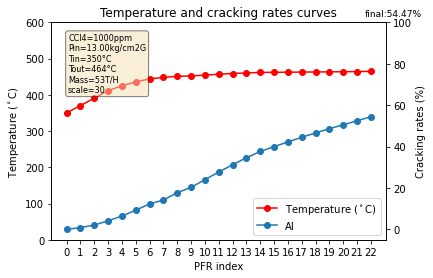

In [65]:
fig, ax1 = plt.subplots()
scale = 30
# print("Schi cracking rates")
# print(results['Schirmeister']*100)
# cracking_rates=[  0.4715442657470703, 1.0857760906219482, 2.0534396171569824, 3.2067030668258667, 4.798993468284607, 6.7749470472335815, 9.51007604598999, 12.378469109535217, 15.592828392982483, 18.829232454299927, 22.074568271636963, 25.571835041046143, 28.94338071346283, 32.39981532096863, 35.7147753238678, 38.93124163150787, 41.99226498603821, 44.94119882583618, 47.89147973060608, 50.684571266174316, 53.38115096092224, 55.9553682804107]
ndata=range(23)
ln = ax1.plot(ndata, T_list, color='r',
                marker='o', label='Temperature ($^\circ$C)')
ax1.set_ylabel('Temperature ($^\circ$C)')
ax1.set_ylim(0, 600)
# textstr = '\n'.join(
#     (r'CCl4=%dppm' % (CCl4_X_0),
#      r'Pin=%.2fkg/cm2G' % (pressure_0),
#      r'Tin=%d°C' % (T_list[0]),
#      r'Mass=%dT/H' % (mass_flow_rate),
#      r'scale=texas'
#      )
# )
textstr = '\n'.join(
    (r'CCl4=%dppm' % (CCl4),
        r'Pin=%.2fkg/cm2G' % (Pin),
        r'Tin=%d°C' % (T_list[0]),
        r'Tout=%d°C' % (T_list[-1]),
        r'Mass=%dT/H' % (53),
        #  r'scale=texas'
        r'scale=%d' % (scale)
        )
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
            fontsize=8, verticalalignment='top', bbox=props)
ax2 = ax1.twinx()
lns = ln
import itertools
marker = itertools.cycle(('D', 'x', '.', 'o', '*'))
# for label in results.keys():
#     cracking_rates = [
#         i * 100 for i in results[label]['cracking_rates']]
#     lns += ax2.plot(range(ndata), cracking_rates,
#                     marker=next(marker), label=label)
cracking_rates = [
        i  for i in X]

lns += ax2.plot(ndata[:], cracking_rates,
                    marker='o', label='AI')
ax2.set_ylabel('Cracking rates (%)')
ax2.set_ylim(-5, 100)
text_crack = f"final:{(cracking_rates[-1]):.2f}%"
fig.text(0.85, 0.90, text_crack, fontsize=9)
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right', frameon=True)

plt.title('Temperature and cracking rates curves')
ax1.set_xlabel('PFR index')
plt.xticks(np.arange(min(ndata),max(ndata)+1,1))
plt.show()



[20.389999999999986, 20.360000000000014, 20.74000000000001, 13.519999999999982, 10.699999999999989, 8.29000000000002, 4.279999999999973, 2.650000000000034, 1.3199999999999932, 2.25, 2.4499999999999886, 1.8899999999999864, 1.5600000000000023, 1.4300000000000068, 0.36000000000001364, 0.3100000000000023, 0.29000000000002046, 0.2899999999999636, 0.3100000000000023, 0.37000000000000455, 0.4399999999999977, 0.5300000000000296]
[0.9268820285797119, 1.1590749025344849, 2.099195122718811, 2.288159728050232, 2.8261154890060425, 3.0050337314605713, 1.9190043210983276, 3.478264808654785, 2.6322633028030396, 3.700137138366699, 3.704291582107544, 3.508135676383972, 3.371015191078186, 3.0274271965026855, 2.3382991552352905, 2.2861838340759277, 2.2242575883865356, 2.1281927824020386, 2.0201027393341064, 1.9169598817825317, 1.9053936004638672, 2.0028889179229736]


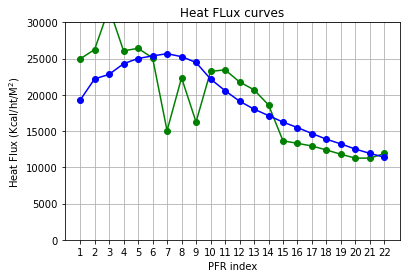

In [66]:

fig2, ax3 = plt.subplots()

ratio = [0.045775715, 0.052760646, 0.054246201, 0.057755337, 0.059452529, 0.060304555, 0.06103342,0.060060211, 0.058149083, 0.052729307, 0.048923541, 0.045456762, 0.042852356, 0.04072963,0.038601821, 0.036790655, 0.0348499, 0.032971834, 0.031425517, 0.029733461, 0.028328363, 0.027069159]
mass_flow_kg = 53053
Cp = 0.29
mole_cracking_heat = 171
T_delta = [T_list[i] - T_list[i-1] for i in range(1, 23)]
X_delta = [cracking_rates[i] - cracking_rates[i-1] for i in range(1, 23)]
print(T_delta)
print(X_delta)
Q1 = [mass_flow_kg * Cp * t_delta for t_delta in T_delta]
Q2 = [mass_flow_kg / 100 * mole_cracking_heat *
        x_delta for x_delta in X_delta]
hf = [(a+b)/15.94 for a, b in zip(Q1, Q2)]
total_heat_flux = (T_list[-1]-T_list[0])*mass_flow_kg*Cp + \
        mole_cracking_heat * (cracking_rates[-1]-0) * mass_flow_kg/100
hf_FPC = [i * total_heat_flux/15.94 for i in ratio]
ln5 = ax3.plot(range(1,23),hf, color='g',
                marker='o', label='Heat Flux (Kcal/ht/M$^2$)')
ln6 = ax3.plot(range(1,23),hf_FPC, color='b',
                marker='o', label='Heat Flux FPC (Kcal/ht/M$^2$)')
ax3.set_ylabel('Heat Flux (Kcal/ht/M$^2$)')
ax3.set_ylim(0,30000)
plt.title('Heat FLux curves')
ax3.set_xlabel('PFR index')
plt.xticks(np.arange(1,23,1))
plt.grid()
plt.show()